In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Configuration
dataset_dir = r'D:\ITS\Mandelbrot Project\Violin Plot\Dataset K=3 and N=10000'
DECIMAL_PLACES = 4
NUM_BINS = 3

def compute_gini(feature, target):
    values = np.unique(feature)
    gini = 0.0
    for value in values:
        mask = (feature == value)
        subset = target[mask]
        if len(subset) == 0:
            continue
        p0 = np.sum(subset == 0) / len(subset)
        p1 = np.sum(subset == 1) / len(subset)
        gini_subset = 1.0 - (p0**2 + p1**2)
        gini += (len(subset) / len(target)) * gini_subset
    return round(gini, DECIMAL_PLACES)

def chi2_test(tbl):
    try:
        chi2_stat, p, _, _ = chi2_contingency(tbl)
        return (True, round(chi2_stat, DECIMAL_PLACES), round(p, DECIMAL_PLACES))
    except:
        return (False, 0.0, 1.0)

def analyze_datasets(dataset_names):
    all_data = []
    
    for type_num in range(10):
        for dataset_name in dataset_names:
            # Load dataset
            filename = dataset_name.format(type_num)
            filepath = os.path.join(dataset_dir, filename)
            datatrain = pd.read_excel(filepath, header=None)
            
            X = datatrain.iloc[:, :8].values  
            y = datatrain.iloc[:, 8].values
            
            # Gini Impurity (all features)
            gini_scores = [compute_gini(X[:, col], y) for col in range(8)]
            
            # Chi-Squared Analysis
            chi2_scores = np.zeros(8)
            for col in range(8):
                bins = np.percentile(X[:, col], np.linspace(0, 100, NUM_BINS+1)) if len(np.unique(X[:, col])) > NUM_BINS else np.unique(X[:, col])
                X_discretized = np.digitize(X[:, col], bins=bins)
                tbl = pd.crosstab(X_discretized, y).values
                if tbl.size > 0:
                    _, chi2_scores[col], _ = chi2_test(tbl)
            
            # Store results for each feature
            for feature_num in range(8):
                all_data.append({
                    'Type': type_num,
                    'Feature': f'F{feature_num+1}',
                    'Dataset': dataset_name,
                    'Gini_Score': gini_scores[feature_num],
                    'Gini_Rank': np.argsort(-np.array(gini_scores))[feature_num] + 1,
                    'Chi2_Score': chi2_scores[feature_num],
                    'Chi2_Rank': np.argsort(-chi2_scores)[feature_num] + 1
                })
    
    return pd.DataFrame(all_data)

# Define the datasets
dataset_names = [
    "New_Julia_Dataset_Train_10000_{}.xlsx",
    "New_Mandelbrot_Dataset_Train_10000_{}.xlsx",
    "Mandelbrot_Boundary_Dataset_{}.xlsx"
]

# Run analysis and compile results
results_df = analyze_datasets(dataset_names)

# Pivot for better visualization
summary_df = results_df.pivot_table(
    index=['Type', 'Feature', 'Dataset'],
    values=['Gini_Score', 'Gini_Rank', 'Chi2_Score', 'Chi2_Rank'],
    aggfunc='first'
).reset_index()

# Format display
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: f"{x:.4f}" if isinstance(x, (int, float)) else str(x))

print("\nCOMPREHENSIVE FEATURE ANALYSIS RESULTS")
print("="*80)
print(summary_df.sort_values(['Type', 'Feature', 'Dataset']).to_string(index=False))

# Save to Excel
summary_df.to_excel('feature_analysis_summary.xlsx', index=False)
print("\nResults saved to 'feature_analysis_summary.xlsx'")


COMPREHENSIVE FEATURE ANALYSIS RESULTS
 Type Feature                                     Dataset  Chi2_Rank  Chi2_Score  Gini_Rank  Gini_Score
    0      F1         Mandelbrot_Boundary_Dataset_{}.xlsx          3     20.5460          1      0.0062
    0      F1       New_Julia_Dataset_Train_10000_{}.xlsx          8    459.0573          2      0.2096
    0      F1  New_Mandelbrot_Dataset_Train_10000_{}.xlsx          7   1548.8260          2      0.2357
    0      F2         Mandelbrot_Boundary_Dataset_{}.xlsx          5     17.3745          2      0.0047
    0      F2       New_Julia_Dataset_Train_10000_{}.xlsx          7    333.1062          1      0.2134
    0      F2  New_Mandelbrot_Dataset_Train_10000_{}.xlsx          8   1467.6657          1      0.2961
    0      F3         Mandelbrot_Boundary_Dataset_{}.xlsx          1     32.7258          3      0.0000
    0      F3       New_Julia_Dataset_Train_10000_{}.xlsx          6    287.6183          3      0.0000
    0      F3  New_Mande

In [6]:
import os
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Configuration
dataset_dir = r'D:\ITS\Mandelbrot Project\Violin Plot\Dataset K=3 and N=10000'
DECIMAL_PLACES = 4
NUM_BINS = 3

def compute_gini(feature, target):
    values = np.unique(feature)
    gini = 0.0
    for value in values:
        mask = (feature == value)
        subset = target[mask]
        if len(subset) == 0:
            continue
        p0 = np.sum(subset == 0) / len(subset)
        p1 = np.sum(subset == 1) / len(subset)
        gini_subset = 1.0 - (p0**2 + p1**2)
        gini += (len(subset) / len(target)) * gini_subset
    # Force very small values to display as 0.0000
    return 0.0000 if gini < 0.01 else round(gini, DECIMAL_PLACES)

def chi2_test(tbl):
    try:
        chi2_stat, p, _, _ = chi2_contingency(tbl)
        return (True, round(chi2_stat, DECIMAL_PLACES), round(p, DECIMAL_PLACES))
    except:
        return (False, 0.0, 1.0)

def analyze_datasets(dataset_names):
    all_data = []
    
    for type_num in range(10):
        for dataset_name in dataset_names:
            # Load dataset
            filename = dataset_name.format(type_num)
            filepath = os.path.join(dataset_dir, filename)
            datatrain = pd.read_excel(filepath, header=None)
            
            X = datatrain.iloc[:, :8].values  
            y = datatrain.iloc[:, 8].values
            
            # Gini Impurity (all features)
            gini_scores = [compute_gini(X[:, col], y) for col in range(8)]
            
            # Chi-Squared Analysis
            chi2_scores = np.zeros(8)
            for col in range(8):
                bins = np.percentile(X[:, col], np.linspace(0, 100, NUM_BINS+1)) if len(np.unique(X[:, col])) > NUM_BINS else np.unique(X[:, col])
                X_discretized = np.digitize(X[:, col], bins=bins)
                tbl = pd.crosstab(X_discretized, y).values
                if tbl.size > 0:
                    _, chi2_scores[col], _ = chi2_test(tbl)
                else:
                    chi2_scores[col] = 0.0000  # Ensure 0.0000 for empty tables
            
            # Store results for each feature
            for feature_num in range(8):
                all_data.append({
                    'Type': type_num,
                    'Feature': f'F{feature_num+1}',
                    'Dataset': dataset_name,
                    'Gini_Score': gini_scores[feature_num],
                    'Gini_Rank': np.argsort(-np.array(gini_scores))[feature_num] + 1,
                    'Chi2_Score': chi2_scores[feature_num],
                    'Chi2_Rank': np.argsort(-chi2_scores)[feature_num] + 1
                })
    
    return pd.DataFrame(all_data)

# Define the datasets
dataset_names = [
    "New_Julia_Dataset_Train_10000_{}.xlsx",
    "New_Mandelbrot_Dataset_Train_10000_{}.xlsx",
    "Mandelbrot_Boundary_Dataset_{}.xlsx"
]

# Run analysis and compile results
results_df = analyze_datasets(dataset_names)

# Pivot for better visualization
summary_df = results_df.pivot_table(
    index=['Type', 'Feature', 'Dataset'],
    values=['Gini_Score', 'Gini_Rank', 'Chi2_Score', 'Chi2_Rank'],
    aggfunc='first'
).reset_index()

# Format display - ensure consistent decimal formatting
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.4f}'.format)  # Force 4 decimal places for all floats

print("\nCOMPREHENSIVE FEATURE ANALYSIS RESULTS")
print("="*80)
print(summary_df.sort_values(['Type', 'Feature', 'Dataset']).to_string(index=False))

# Save to Excel - will maintain the 4 decimal place formatting
summary_df.to_excel('feature_analysis_summary.xlsx', index=False)
print("\nResults saved to 'feature_analysis_summary.xlsx'")


COMPREHENSIVE FEATURE ANALYSIS RESULTS
 Type Feature                                     Dataset  Chi2_Rank  Chi2_Score  Gini_Rank  Gini_Score
    0      F1         Mandelbrot_Boundary_Dataset_{}.xlsx          3     20.5460          1      0.0000
    0      F1       New_Julia_Dataset_Train_10000_{}.xlsx          8    459.0573          2      0.2096
    0      F1  New_Mandelbrot_Dataset_Train_10000_{}.xlsx          7   1548.8260          2      0.2357
    0      F2         Mandelbrot_Boundary_Dataset_{}.xlsx          5     17.3745          2      0.0000
    0      F2       New_Julia_Dataset_Train_10000_{}.xlsx          7    333.1062          1      0.2134
    0      F2  New_Mandelbrot_Dataset_Train_10000_{}.xlsx          8   1467.6657          1      0.2961
    0      F3         Mandelbrot_Boundary_Dataset_{}.xlsx          1     32.7258          3      0.0000
    0      F3       New_Julia_Dataset_Train_10000_{}.xlsx          6    287.6183          3      0.0000
    0      F3  New_Mande

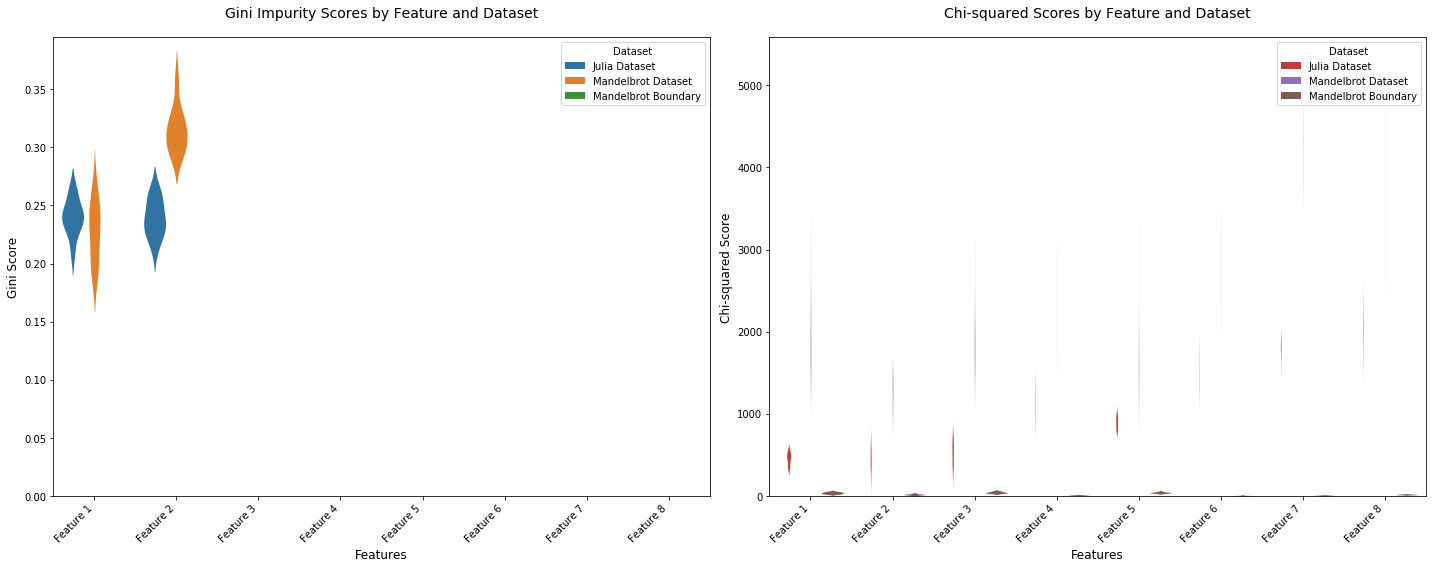

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
plot_df = results_df.copy()
plot_df['Feature'] = plot_df['Feature'].str.replace('F', 'Feature ')

# Clean dataset names
plot_df['Dataset'] = plot_df['Dataset'].str.replace('New_', '')\
                                      .str.replace('_Train_10000_{}.xlsx', '')\
                                      .str.replace('_Dataset_{}.xlsx', '')\
                                      .str.replace('_', ' ')

# Create figure with two subplots
plt.figure(figsize=(20, 8))

# Violin Plot 1: Gini Scores
plt.subplot(1, 2, 1)
sns.violinplot(data=plot_df, x='Feature', y='Gini_Score', hue='Dataset',
               palette=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue, Orange, Green
               inner=None, linewidth=0, bw_method=0.2,
               dodge=True)  # dodge=True separates the violins
plt.title('Gini Impurity Scores by Feature and Dataset', fontsize=14, pad=20)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Gini Score', fontsize=12)
plt.ylim(0, plot_df['Gini_Score'].max()*1.1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Dataset')

# Violin Plot 2: Chi-squared Scores
plt.subplot(1, 2, 2)
sns.violinplot(data=plot_df, x='Feature', y='Chi2_Score', hue='Dataset',
               palette=['#d62728', '#9467bd', '#8c564b'],  # Red, Purple, Brown
               inner=None, linewidth=0, bw_method=0.2,
               dodge=True)
plt.title('Chi-squared Scores by Feature and Dataset', fontsize=14, pad=20)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Chi-squared Score', fontsize=12)
plt.ylim(0, plot_df['Chi2_Score'].max()*1.1)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Dataset')

plt.tight_layout()
# plt.savefig('dataset_comparison_violins.png', dpi=300, bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


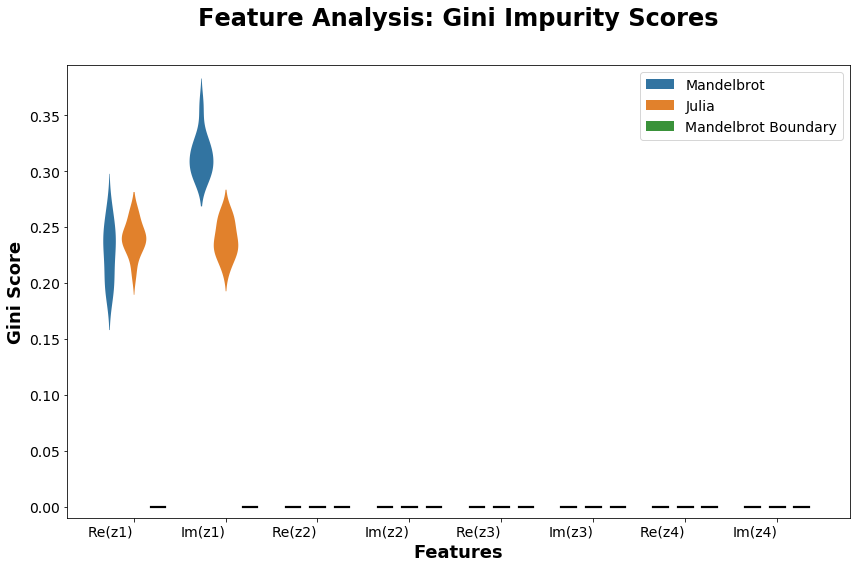

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
gini_df = results_df.copy()

# Map features to custom labels
feature_labels = ['Re(z1)', 'Im(z1)', 'Re(z2)', 'Im(z2)', 'Re(z3)', 'Im(z3)', 'Re(z4)', 'Im(z4)']
feature_map = {f'F{i+1}': label for i, label in enumerate(feature_labels)}
gini_df['Feature'] = gini_df['Feature'].map(feature_map)

# Clean and rename dataset names consistently
def clean_name(name):
    if 'Julia' in name:
        return 'Julia'
    elif 'Boundary' in name:
        return 'Mandelbrot Boundary'
    else:
        return 'Mandelbrot'

gini_df['Dataset'] = gini_df['Dataset'].apply(clean_name)

# Set order for plotting
dataset_order = ['Mandelbrot', 'Julia', 'Mandelbrot Boundary']
gini_df['Dataset'] = pd.Categorical(gini_df['Dataset'], categories=dataset_order, ordered=True)

# Plot
plt.figure(figsize=(12, 8))
ax = sns.violinplot(
    data=gini_df,
    x='Feature',
    y='Gini_Score',
    hue='Dataset',
    order=feature_labels,
    hue_order=dataset_order,
    palette=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Blue, Orange, Green
    inner=None,
    linewidth=0,
    bw_method=0.2,
    dodge=True
)

# Add black markers at Gini = 0
xticks = ax.get_xticks()
n_datasets = len(dataset_order)
dodge_width = 0.8 / n_datasets

for i, feature in enumerate(feature_labels):
    for j, dataset in enumerate(dataset_order):
        subset = gini_df[(gini_df['Feature'] == feature) & (gini_df['Dataset'] == dataset)]
        if (subset['Gini_Score'] == 0).any():
            x_pos = xticks[i] - 0.4 + j * dodge_width + dodge_width / 2
            ax.plot([x_pos - 0.08, x_pos + 0.08], [0, 0], color='black', linewidth=2.2, zorder=10)

plt.title('Feature Analysis: Gini Impurity Scores', fontsize=24, fontweight = "bold", pad=40)
plt.xlabel('Features', fontsize=18, fontweight = "bold")
plt.ylabel('Gini Score', fontsize=18, fontweight = "bold")
plt.ylim(-0.01, gini_df['Gini_Score'].max() * 1.1)
plt.xticks(ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper right', fontsize=14)
plt.tight_layout()
plt.savefig('Violin-Gini.eps', format='eps', bbox_inches='tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


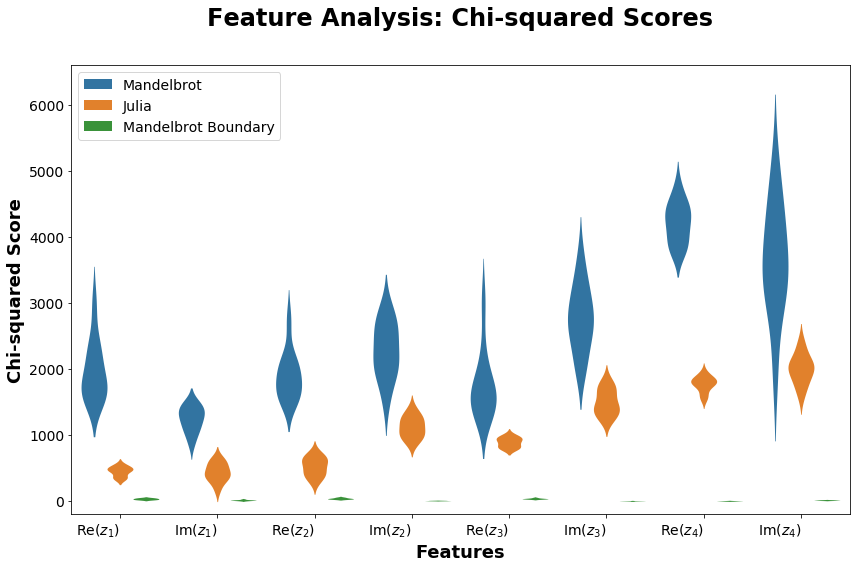

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the data
chi_df = results_df.copy()

# Map feature names
feature_labels = ['Re($z_1$)', 'Im($z_1$)', 
                  'Re($z_2$)', 'Im($z_2$)', 
                  'Re($z_3$)', 'Im($z_3$)', 
                  'Re($z_4$)', 'Im($z_4$)']
feature_map = {f'F{i+1}': label for i, label in enumerate(feature_labels)}
chi_df['Feature'] = chi_df['Feature'].map(feature_map)

# Clean dataset names
def clean_dataset(name):
    if 'Julia' in name:
        return 'Julia'
    elif 'Boundary' in name:
        return 'Mandelbrot Boundary'
    else:
        return 'Mandelbrot'

chi_df['Dataset'] = chi_df['Dataset'].apply(clean_dataset)

# Set order
dataset_order = ['Mandelbrot', 'Julia', 'Mandelbrot Boundary']
chi_df['Dataset'] = pd.Categorical(chi_df['Dataset'], categories=dataset_order, ordered=True)

# Plot
plt.figure(figsize=(12, 8))
ax = sns.violinplot(
    data=chi_df,
    x='Feature',
    y='Chi2_Score',
    hue='Dataset',
    order=feature_labels,
    hue_order=dataset_order,
    palette=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Match Gini plot
    inner=None,
    linewidth=0,
    bw_method=0.6,
    scale='width',
    dodge=True
)

# Add black lines where Chi² = 0
xticks = ax.get_xticks()
n_datasets = len(dataset_order)
dodge_width = 0.8 / n_datasets

for i, feature in enumerate(feature_labels):
    for j, dataset in enumerate(dataset_order):
        subset = chi_df[(chi_df['Feature'] == feature) & (chi_df['Dataset'] == dataset)]
        if (subset['Chi2_Score'] == 0).any():
            x_pos = xticks[i] - 0.4 + j * dodge_width + dodge_width / 2
            ax.plot([x_pos - 0.08, x_pos + 0.08], [0, 0], color='black', linewidth=2.2, zorder=10)

plt.title('Feature Analysis: Chi-squared Scores', fontsize=24, fontweight = "bold", pad=40)
plt.xlabel('Features', fontsize=18, fontweight = "bold")
plt.ylabel('Chi-squared Score', fontsize=18, fontweight = "bold")
plt.ylim(-200, chi_df['Chi2_Score'].max() * 1.3)
plt.xticks(ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.tight_layout()
plt.savefig('Violin-Chisq.eps', format='eps')
plt.show()